# Hass Consulting Company: Real Estate Properties Analysis

> Overall Learning Outcome

During this week’s Independent project, you will get to test the skills that you learned this week. More specifically, you will get the test your understanding of the following learning outcomes.

Overall Learning Outcomes

* I can understand and apply supervised learning algorithms such as regression, decision trees, KNN, SVM, naive Bayes, random forests to solving business problems.
* I can understand the benefits, limitations, and requirements of various supervised learning algorithms.

## 1. Defining the Question

### a) Specifying the Question

>
* Determine the the factors that affect housing prices
* Create a model that would allow the company to accurately predict the sale of prices



### b) Defining the Metric for Success

This project will be successful when: 

* Identify the factors that affect housing prices
* The model achieves atleast 80% accuracy and have the lowest RMSE score possible

### c) Understanding the context 

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### d) Recording the Experimental Design

Our design is expected to:

* Define the question, the metric for success, the context, experimental design taken.
* Read and explore the given dataset.
* Define the appropriateness of the available data to answer the given question.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
* Performing regression analysis.
* Incorporate categorical independent variables into your models.
Check for multicollinearity
* Provide a recommendation based on your analysis. 
* Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
* Challenge your solution by providing insights on how you can make improvements in model improvement.

While performing regression analysis, will be required to perform modeling using the following regression techniques then evaluate their performance. Will be then required to provide observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

* Multiple Linear Regression
* Quantile Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression

### e) Data Relevance

The dataset to use for this project can be found by following this [link](http://bit.ly/IndependentProjectWeek7Dataset)

Below is the dataset glossary:

* Id 
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15


## 2. Reading the Data

In [ ]:
# Installing packages
!!pip install factor_analyzer==0.2.3

['Collecting factor_analyzer==0.2.3',
 '  Downloading factor_analyzer-0.2.3-py2.py3-none-any.whl (23 kB)',
 'Requirement already satisfied: scipy in /usr/local/lib/python3.7/dist-packages (from factor_analyzer==0.2.3) (1.4.1)',
 'Requirement already satisfied: pandas in /usr/local/lib/python3.7/dist-packages (from factor_analyzer==0.2.3) (1.3.5)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.7/dist-packages (from factor_analyzer==0.2.3) (1.21.6)',
 'Requirement already satisfied: pytz>=2017.3 in /usr/local/lib/python3.7/dist-packages (from pandas->factor_analyzer==0.2.3) (2022.1)',
 'Requirement already satisfied: python-dateutil>=2.7.3 in /usr/local/lib/python3.7/dist-packages (from pandas->factor_analyzer==0.2.3) (2.8.2)',
 'Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.7/dist-packages (from python-dateutil>=2.7.3->pandas->factor_analyzer==0.2.3) (1.15.0)',
 'Installing collected packages: factor-analyzer',
 'Successfully installed factor-analy

In [ ]:
# Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from scipy.stats import bartlett, chi2, loguniform
import os
from scipy import stats
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import FactorAnalyzer
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Machine Learning: Supervised/Week 7 IP')

Mounted at /content/drive


In [ ]:
# Loading the Dataset 
df = pd.read_csv('Independent Project Week 7 - house_data.csv')

## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
print(df.shape)

(21613, 20)


In [ ]:
# Previewing the top of our dataset
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Previewing the bottom of our dataset
df.tail() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking whether each column has an appropriate datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## 4. External Data Source Validation

> We don't have any other external data set to compare with this data set

## 5. Data Preperation/Tidying the Dataset

### a.Validation

In [ ]:
# Checking for irrelevant columns
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

> The id column will not be useful in our analysis, so will drop it.

In [ ]:
# Dropping the id column
df = df.drop(columns=['id'])

### b. Completeness

In [ ]:
# Checking for missing values
df.isnull().any().any()

False

In [ ]:
# Identifying the Missing Data
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

> We don't have any missing values

### c. Consistency

In [ ]:
# Checking for duplicates
df.duplicated().any().any()

True

In [ ]:
# Dropping duplicates
df.drop_duplicates(inplace = True)
# Checking changes
df.duplicated().any().any()

False

> The duplicate data in our dataset have been dropped. The result dataset has no duplicates.

### d. Uniformity

In [ ]:
# Checking column names
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

> The columns naming is uniform

### e. Outliers

In [ ]:
# Creating an outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [ ]:
# Checking for Outliers
outliers(df)

Number of outliers = 6680
Percentage = 30.91447611995557%


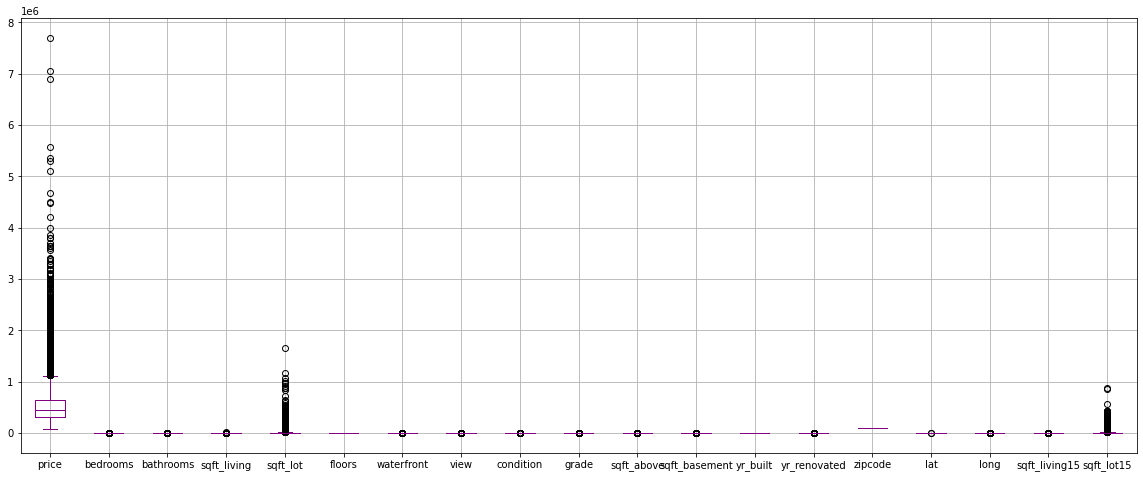

In [ ]:
# Viewing the outliers
df.boxplot(figsize=(20,8),color='purple')

Though we have a great number of outliers in price, sqft_lot and sqft_lot15, they form over 30% of our data set hence dropping them will hugely affect our analysis. Thus, will keep them.

### f. Anomalies

In [ ]:
# Checking for Anomalies
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,5.401924e+05,3.370927,2.114738,2079.958950,1.510962e+04,1.494146,0.007544,0.234219,3.409478,7.656655,1788.414846,291.544104,1970.999907,84.330155,98077.942614,47.560050,-122.213894,1986.583164,12770.108340
std,3.673996e+05,0.930103,0.770238,918.505805,4.142491e+04,0.539910,0.086527,0.766169,0.650782,1.175484,828.141155,442.612560,29.371463,401.517026,53.506883,0.138578,0.140830,685.421474,27307.006892
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.218375e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


> The maximum bedrooms at 33 looks like an anomally. Let's take a keener look in that colum.

In [ ]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

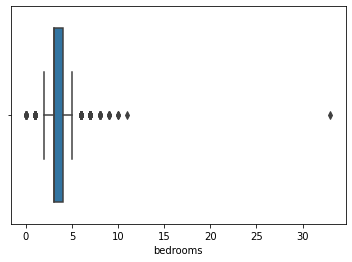

In [ ]:
sb.boxplot(df.bedrooms)

> The 33 bedrooms is definetly an anomally and we have to drop it.

In [ ]:
df.drop(df[df['bedrooms'] == 33].index, inplace = True)

In [ ]:
# Checking our dataset again
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.401878e+05,3.369556,2.114754,2079.980238,1.511004e+04,1.494169,0.007544,0.234230,3.409404,7.656685,1788.449484,291.530754,1971.001018,84.334058,98077.941454,47.560044,-122.213889,1986.613551,12770.481835
std,3.674075e+05,0.908018,0.770252,918.521730,4.142583e+04,0.539912,0.086529,0.766185,0.650707,1.175502,828.144667,442.618452,29.371689,401.525908,53.507849,0.138579,0.140831,685.422780,27307.583622
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.217250e+05,3.000000,1.750000,1428.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


> Our data set now looks okay

## 6. Exploratory Descriptive Analysis

#### a) Univariate Analysis

##### Categorical Analysis

> Frequecy tables, Bar Charts, Histograms, Pie charts etc.

In [ ]:
# Number of unique values
cols = df.columns.tolist()
print(f'Number of unique values\n')
for col in cols:
  print(f'{col}: {len(df[col].unique().tolist())}')

Number of unique values

price: 3625
bedrooms: 12
bathrooms: 30
sqft_living: 1038
sqft_lot: 9782
floors: 6
waterfront: 2
view: 5
condition: 5
grade: 12
sqft_above: 946
sqft_basement: 306
yr_built: 116
yr_renovated: 70
zipcode: 70
lat: 5034
long: 752
sqft_living15: 777
sqft_lot15: 8689


In [ ]:
# columns with specific data type
integer_columns = df.select_dtypes(include=['int64']).columns
float_columns = df.select_dtypes(include=['float64']).columns
object_columns = df.select_dtypes(include=['object']).columns

In [ ]:
# categorical columns
object_columns

Index([], dtype='object')

> We don't have any categorical column. We will change zipcode column to categorical and analyze it.

In [ ]:
# convert column "zipcode" to object dtype
df_zip = df.astype({"zipcode": object})

In [ ]:
df_zip.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=object)

In [ ]:
df_zip.zipcode.value_counts().head(10)

98103    601
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    497
Name: zipcode, dtype: int64

Text(0, 0.5, 'Number of Properties')

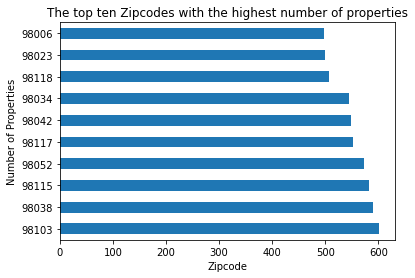

In [ ]:
# The top ten zipcodes 
df_zip['zipcode'].value_counts()[:10].plot(kind='barh')
plt.title('The top ten Zipcodes with the highest number of properties')
plt.xlabel("Zipcode")
plt.ylabel("Number of Properties")

In [ ]:
df_zip.zipcode.value_counts().tail(10)

98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, dtype: int64

Text(0, 0.5, 'Number of Properties')

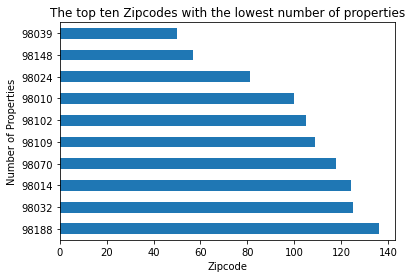

In [ ]:
# The bottom ten zipcodes 
df_zip['zipcode'].value_counts()[60:].plot(kind='barh')
plt.title('The top ten Zipcodes with the lowest number of properties')
plt.xlabel("Zipcode")
plt.ylabel("Number of Properties")

> Zipcode 98103 has the highest number of houses (601) while Zipcode 98039 has the lowest number of houses (50)

In [ ]:
# Categorical Plots
def CatPlots(column, data):
  fig,ax  = plt.subplots(figsize = (10,5))
  sb.countplot(data[column], palette = 'viridis', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  plt.show()

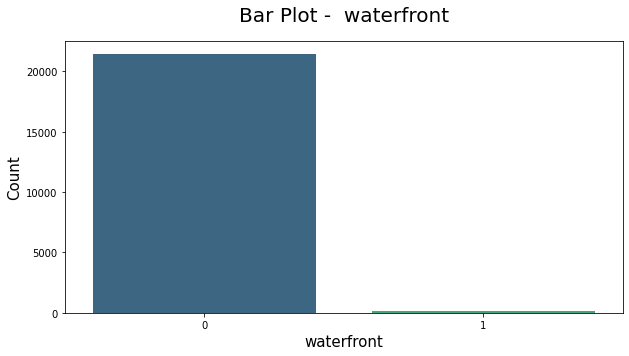

In [ ]:
# Waterfront count plot
CatPlots('waterfront', df)

> Majority of the properties has no waterfront

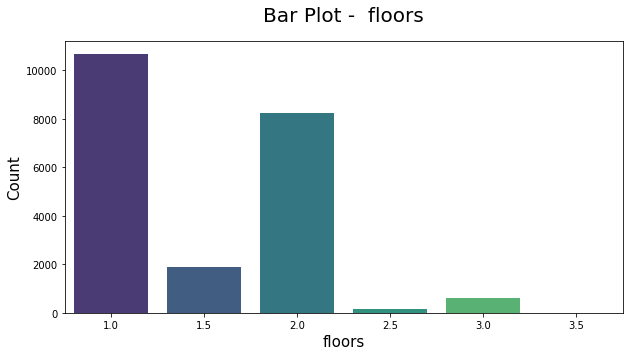

In [ ]:
# Floors count plot
CatPlots('floors', df)

> Majority of the properties have 1 floor

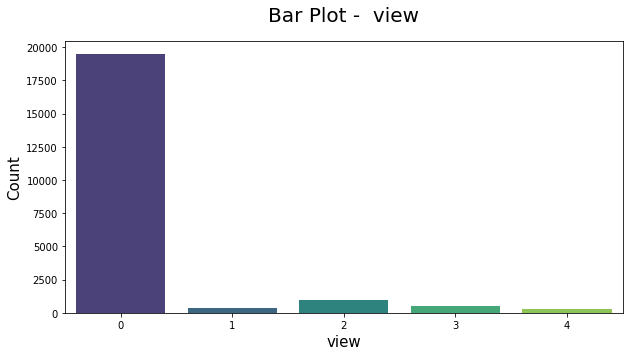

In [ ]:
# View count plot
CatPlots('view', df)

> Majority of the properties have 0 Views

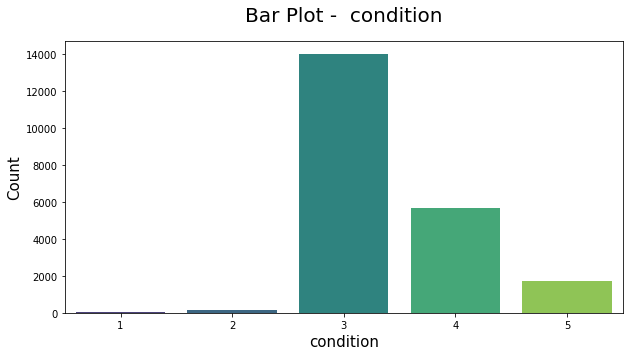

In [ ]:
# condition count plot
CatPlots('condition', df)

> Majority of the properties have condition 3

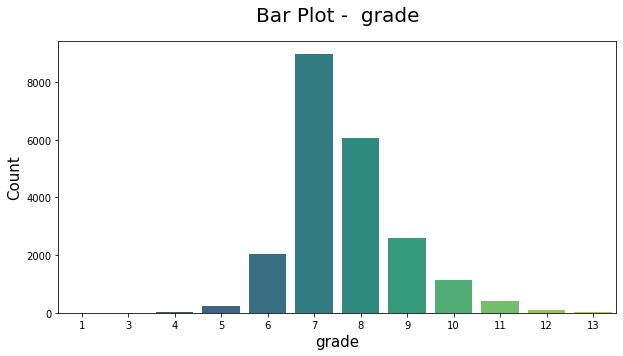

In [ ]:
# grade count plot
CatPlots('grade', df)

> Majority of the properties have grade 7

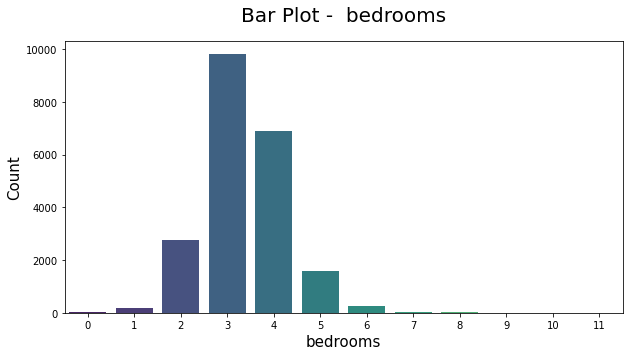

In [ ]:
# bedrooms count plot
CatPlots('bedrooms', df)

> Majority of the properties have 3 bedrooms

##### Numerical Analysis

> Measures of Central Tendency and Measures of Dispersion/Variability/Spread, 

In [ ]:
# Describing the Data
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.401878e+05,3.369556,2.114754,2079.980238,1.511004e+04,1.494169,0.007544,0.234230,3.409404,7.656685,1788.449484,291.530754,1971.001018,84.334058,98077.941454,47.560044,-122.213889,1986.613551,12770.481835
std,3.674075e+05,0.908018,0.770252,918.521730,4.142583e+04,0.539912,0.086529,0.766185,0.650707,1.175502,828.144667,442.618452,29.371689,401.525908,53.507849,0.138579,0.140831,685.422780,27307.583622
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.217250e+05,3.000000,1.750000,1428.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {data[column].mode()}")

In [ ]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")

In [ ]:
# Distribution and Boxplot functions
def NumericalPlots(column, data1, data2):
  fig, ax = plt.subplots(2,2, figsize = (12,10))
  # Outliers
  # Distribution plot
  sb.distplot(data1[column], hist=True, ax=ax[0,0], color = 'green')
  ax[0,0].set_title('Outliers: Freq dist '+ column, fontsize=10)
  ax[0,0].set_xlabel(column, fontsize=8)
  ax[0,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data1[column], ax = ax[0,1], color = 'green')
  ax[0,1].set_title(f'Outliers: Box Plot - {column}')
  ax[0,1].set_xlabel(column)

  # No outliers
  # Distribution plot
  sb.distplot(data2[column], hist=True, ax=ax[1,0], color = 'green')
  ax[1,0].set_title('No outliers: Freq dist '+ column, fontsize=10)
  ax[1,0].set_xlabel(column, fontsize=8)
  ax[1,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data2[column], ax = ax[1,1], color = 'green')
  ax[1,1].set_title(f'No outliers: Box Plot - {column}')
  ax[1,1].set_xlabel(column)
  plt.show()

In [ ]:
# Numerical columns
numerical = df.select_dtypes(exclude = 'object').columns.tolist()
numerical

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [ ]:
# Mean
MeasureCentral('mean', numerical, df)

price column mean = 540187.788587032
bedrooms column mean = 3.3695561623547925
bathrooms column mean = 2.114754477715555
sqft_living column mean = 2079.9802378858703
sqft_lot column mean = 15110.03790438284
floors column mean = 1.4941685564863239
waterfront column mean = 0.00754385152959689
view column mean = 0.2342296477993243
condition column mean = 3.4094043596982457
grade column mean = 7.65668533345675
sqft_above column mean = 1788.4494839635304
sqft_basement column mean = 291.53075392233995
yr_built column mean = 1971.00101818855
yr_renovated column mean = 84.33405840699773
zipcode column mean = 98077.94145415837
lat column mean = 47.5600437635951
long column mean = -122.21388901744743
sqft_living15 column mean = 1986.6135511639745
sqft_lot15 column mean = 12770.481834590642


In [ ]:
# Median
MeasureCentral('median', numerical, df)

price column median = 450000.0
bedrooms column median = 3.0
bathrooms column median = 2.25
sqft_living column median = 1910.0
sqft_lot column median = 7620.0
floors column median = 1.5
waterfront column median = 0.0
view column median = 0.0
condition column median = 3.0
grade column median = 7.0
sqft_above column median = 1560.0
sqft_basement column median = 0.0
yr_built column median = 1975.0
yr_renovated column median = 0.0
zipcode column median = 98065.0
lat column median = 47.5718
long column median = -122.23
sqft_living15 column median = 1840.0
sqft_lot15 column median = 7620.0


In [ ]:
# Mode
MeasureCentral('mode', numerical, df)

price column mode = 0    350000.0
1    450000.0
dtype: float64
bedrooms column mode = 0    3
dtype: int64
bathrooms column mode = 0    2.5
dtype: float64
sqft_living column mode = 0    1300
dtype: int64
sqft_lot column mode = 0    5000
dtype: int64
floors column mode = 0    1.0
dtype: float64
waterfront column mode = 0    0
dtype: int64
view column mode = 0    0
dtype: int64
condition column mode = 0    3
dtype: int64
grade column mode = 0    7
dtype: int64
sqft_above column mode = 0    1300
dtype: int64
sqft_basement column mode = 0    0
dtype: int64
yr_built column mode = 0    2014
dtype: int64
yr_renovated column mode = 0    0
dtype: int64
zipcode column mode = 0    98103
dtype: int64
lat column mode = 0    47.5322
1    47.5491
2    47.6624
3    47.6846
dtype: float64
long column mode = 0   -122.29
dtype: float64
sqft_living15 column mode = 0    1540
dtype: int64
sqft_lot15 column mode = 0    5000
dtype: int64


In [ ]:
# Range
MeasureDistribution('range', numerical, df)

price column range = 7625000.0
bedrooms column range = 11
bathrooms column range = 8.0
sqft_living column range = 13250
sqft_lot column range = 1650839
floors column range = 2.5
waterfront column range = 1
view column range = 4
condition column range = 4
grade column range = 12
sqft_above column range = 9120
sqft_basement column range = 4820
yr_built column range = 115
yr_renovated column range = 2015
zipcode column range = 198
lat column range = 0.621699999999997
long column range = 1.2040000000000077
sqft_living15 column range = 5811
sqft_lot15 column range = 870549


In [ ]:
# IQR
MeasureDistribution('IQR', numerical, df)

price column IQR = 323275.0
bedrooms column IQR = 1.0
bathrooms column IQR = 0.75
sqft_living column IQR = 1121.5
sqft_lot column IQR = 5652.0
floors column IQR = 1.0
waterfront column IQR = 0.0
view column IQR = 0.0
condition column IQR = 1.0
grade column IQR = 1.0
sqft_above column IQR = 1020.0
sqft_basement column IQR = 560.0
yr_built column IQR = 46.0
yr_renovated column IQR = 0.0
zipcode column IQR = 85.0
lat column IQR = 0.2071499999999986
long column IQR = 0.20300000000000296
sqft_living15 column IQR = 870.0
sqft_lot15 column IQR = 4983.5


In [ ]:
# Variance
MeasureDistribution('var', numerical, df)

price column variance = 134988277690.54301
bedrooms column variance = 0.824497548995634
bathrooms column variance = 0.593288497292569
sqft_living column variance = 843682.1684051416
sqft_lot column variance = 1716099108.0874977
floors column variance = 0.29150537989985287
waterfront column variance = 0.0074872883551170616
view column variance = 0.5870389592006372
condition column variance = 0.4234198386610441
grade column variance = 1.3818056004616848
sqft_above column variance = 685823.5887536632
sqft_basement column variance = 195911.09401617837
yr_built column variance = 862.696101897589
yr_renovated column variance = 161223.0547425663
zipcode column variance = 2863.089925923807
lat column variance = 0.01920400084315218
long column variance = 0.019833418025725406
sqft_living15 column variance = 469804.38790854777
sqft_lot15 column variance = 745704123.2518146


In [ ]:
# Standard Deviation
MeasureDistribution('std', numerical, df)

price column std = 367407.50902852137
bedrooms column std = 0.9080184739286057
bathrooms column std = 0.7702522296576421
sqft_living column std = 918.5217299580569
sqft_lot column std = 41425.826583032685
floors column std = 0.5399123816878558
waterfront column std = 0.08652911853888876
view column std = 0.7661846769549997
condition column std = 0.6507071835019528
grade column std = 1.1755022758215676
sqft_above column std = 828.1446665611409
sqft_basement column std = 442.6184519608038
yr_built column std = 29.371688781845503
yr_renovated column std = 401.52590793442744
zipcode column std = 53.507849199195135
lat column std = 0.13857850065270652
long column std = 0.14083116851650918
sqft_living15 column std = 685.4227804126062
sqft_lot15 column std = 27307.583621620837


In [ ]:
# Skew
MeasureDistribution('skew', numerical, df)

price column skew = 4.02131898694199
bedrooms column skew = 0.5183958618819667
bathrooms column skew = 0.5110814085585113
sqft_living column skew = 1.471395335895975
sqft_lot column skew = 13.058402288531658
floors column skew = 0.6162697189900395
waterfront column skew = 11.3834913385361
view column skew = 3.396578856679523
condition column skew = 1.0327137444459304
grade column skew = 0.7715097692240542
sqft_above column skew = 1.4466975881760886
sqft_basement column skew = 1.577818432418915
yr_built column skew = -0.46988147518304413
yr_renovated column skew = 4.551613672055108
zipcode column skew = 0.4057415256131411
lat column skew = -0.4851082556277739
long column skew = 0.8852100097524273
sqft_living15 column skew = 1.1082103206566047
sqft_lot15 column skew = 9.505615856631263


In [ ]:
# Kurtosis
MeasureDistribution('kurt', numerical, df)

price column kurt = 34.51410668298982
bedrooms column kurt = 1.8388826947636412
bathrooms column kurt = 1.2791082175219781
sqft_living column kurt = 5.241879935127068
sqft_lot column kurt = 285.00610914853047
floors column kurt = -0.4849319480847303
waterfront column kurt = 127.59568563383985
view column kurt = 10.899971464636497
condition column kurt = 0.5259670494548807
grade column kurt = 1.1917265829241135
sqft_above column kurt = 3.4018424848073696
sqft_basement column kurt = 2.7145750958469277
yr_built column kurt = -0.6570939057101772
yr_renovated column kurt = 18.720452470634612
zipcode column kurt = -0.8535926993710068
lat column kurt = -0.6768244313646243
long column kurt = 1.0498408818052862
sqft_living15 column kurt = 1.5969164686356878
sqft_lot15 column kurt = 150.7263203637624


#### b) Bivariate Analysis

##### Numerical and Numerical

> Scatter plots, correlations etc

In [ ]:
# # Explore these types of relationships across the entire data set.
# plt.figure(figsize=(20,8))
# sb.pairplot(df)

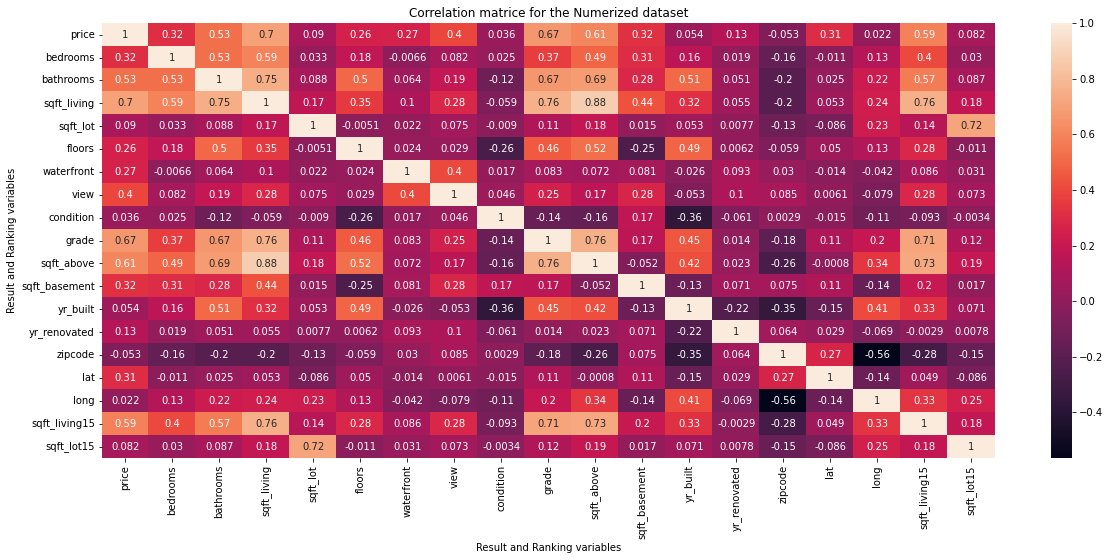

In [ ]:
# Heatmap of correlation
plt.figure(figsize=(20,8))
corr_matrix = df.corr(method = 'pearson')

sb.heatmap(corr_matrix, annot = True)

plt.title("Correlation matrice for the Numerized dataset")

plt.xlabel("Result and Ranking variables")

plt.ylabel("Result and Ranking variables")

plt.show()

We see a strong correlation betweenm price and:
* sqft_living15
* sqft_above
* grade
* sqft_living
* bathrooms

We see a weak correlation between price and:
* lat
* sqft_basement
* view
* waterfront
* floors
* bedrooms

There is hardly a correlation between price and:
* sqft_lot15
* long
* yr_built
* condition
* sqft_lot
* zipcode

In [ ]:
# defining a function to plot regression relation between two variables

def cor(col1,col2,d):
  ans = sb.regplot(x = col1, y = col2, data = d, scatter_kws = {"color": "red"}, line_kws = {"color": "black"})
  return ans

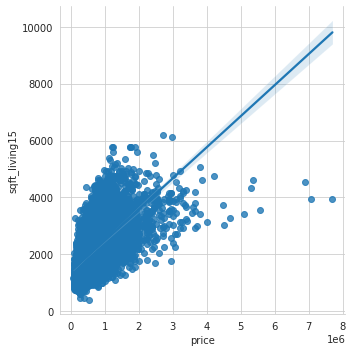

In [ ]:
# Price vs sqft_living15
sb.set_style('whitegrid')
sb.lmplot(x='price',y='sqft_living15',data=df)

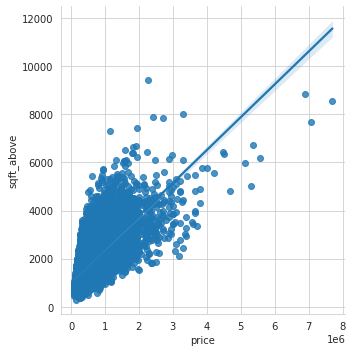

In [ ]:
# Price vs sqft_above
sb.set_style('whitegrid')
sb.lmplot(x='price',y='sqft_above',data=df)

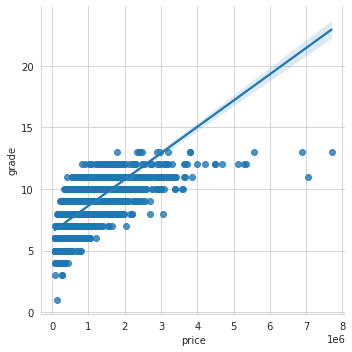

In [ ]:
# Price vs grade
sb.set_style('whitegrid')
sb.lmplot(x='price',y='grade',data=df)

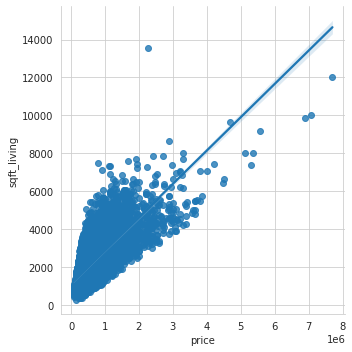

In [ ]:
# Price vs sqft_living
sb.set_style('whitegrid')
sb.lmplot(x='price',y='sqft_living',data=df)

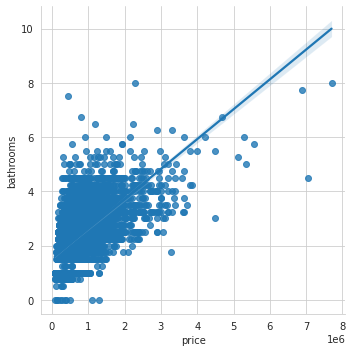

In [ ]:
# Price vs bathrooms
sb.set_style('whitegrid')
sb.lmplot(x='price',y='bathrooms',data=df)

> The following features have a positive linear correlation with price
* sqft_living15
* sqft_above
* grade
* sqft_living
* bathrooms

##### Categorical and Categorical

> Stacked column charts etc

##### Categorical and Numerical

> Z-test, T-test, Line charts etc

#### c) Multivariet Analysis

> Feature reduction (LDA, PCA, FA etc), Feature selection, Feature Engineering, One-Hot Encoding, Label Encoding, Multicollinearity check etc.

##### Multicollinearity Check

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

In [ ]:
# calculating VIF for each feature
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)
  


          feature           VIF
0           price  1.054749e+01
1        bedrooms  2.558558e+01
2       bathrooms  2.892485e+01
3     sqft_living           inf
4        sqft_lot  2.378623e+00
5          floors  1.689582e+01
6      waterfront  1.276298e+00
7            view  1.595971e+00
8       condition  3.492638e+01
9           grade  1.610707e+02
10     sqft_above           inf
11  sqft_basement           inf
12       yr_built  1.022404e+04
13   yr_renovated  1.196773e+00
14        zipcode  1.694539e+06
15            lat  1.592441e+05
16           long  1.376970e+06
17  sqft_living15  2.715973e+01
18     sqft_lot15  2.602364e+00


> We don't have any VIF above 5 hence our dataset has no multicollinearity

##### Factor Analysis

Since this is a marketing data set and the model is supervised learning, we will use factor analysis for feature reduction for our Linear regression.

Will make the following assumptions:

* There are no outliers in data.
* Sample size should be greater than the factor.
* There should not be perfect multicollinearity.
* There should not be homoscedasticity between the variables.

In [ ]:
# Size of original dataset 
df.shape

(21607, 19)

In [ ]:
# Numerical columns
# numerical = df.select_dtypes(exclude = 'object').columns.tolist()
numerical = ['sqft_lot','sqft_lot15']

In [ ]:
# Removing outliers 
def remove_outliers(df_in, col_name):
  Q1 = df[col_name].quantile(0.25)
  Q3 = df[col_name].quantile(0.75)
  IQR = Q3 - Q1
  df_out=  df_in[~ ((df_in[col_name]< (Q1 - 1.5 * IQR)) |(df_in[col_name] > (Q3 + 1.5 * IQR))).any(axis=1)]
  return df_out

In [ ]:
# Removing the outliers
df_out = remove_outliers(df,numerical)
df_out.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_out.shape

(18907, 19)

In [ ]:
# Dataset for analysis
df_fa = df.drop(columns=['price'])
df_fa.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Adequacy Test
# Before we perform factor analysis,we need to evaluate the “factorability” of our dataset. 
# Factorability means "can we found the factors in the dataset?". 
# There are two methods to check the factorability or sampling adequacy:
# - Bartlett’s Test
# - Kaiser-Meyer-Olkin Test
# ---
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
# using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, 
# we should not employ a factor analysis.
# ---


chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.
# If we consider the level of significance of alpha value to be 0.05 then we can clearly 
# see that p-value is less than 0.05.

(941081.6189830896, 0.0)

In [ ]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. 
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
# Value of KMO less than 0.6 is considered inadequate.
# 

kmo_all,kmo_model=calculate_kmo(df)
print(kmo_all)
print(kmo_model)
# The overall KMO for our data is 0.74, which is excellent. 
# This value indicates that you can proceed with your planned factor analysis.

                    KMO
price          0.862467
bedrooms       0.938806
bathrooms      0.922913
sqft_living    0.667374
sqft_lot       0.593925
floors         0.898662
waterfront     0.617113
view           0.789945
condition      0.682843
grade          0.925243
sqft_above     0.650746
sqft_basement  0.279978
yr_built       0.744703
yr_renovated   0.419070
zipcode        0.724748
lat            0.504022
long           0.777707
sqft_living15  0.951964
sqft_lot15     0.606929
0.7428268817847685


KMO returns values between 0 and 1. A rule of thumb for interpreting the statistic:


KMO values between 0.8 and 1 indicate the sampling is adequate.
KMO values less than 0.6 indicate the sampling is not adequate and that remedial action should be taken. Some authors put this value at 0.5, so use your own judgment for values between 0.5 and 0.6.
KMO Values close to zero means that there are large partial correlations compared to the sum of correlations. In other words, there are widespread correlations which are a large problem for factor analysis.
For reference, Kaiser put the following values on the results:

* 0.00 to 0.49 unacceptable.
* 0.50 to 0.59 miserable.
* 0.60 to 0.69 mediocre.
* 0.70 to 0.79 middling.
* 0.80 to 0.89 meritorious.
* 0.90 to 1.00 marvelous.

In [ ]:
# Choosing the Number of Factors
# For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.
# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df_fa, 18, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# Here, we can see only for 6-factors eigenvalues are greater than one. 
# It means we need to choose only 6 factors (or unobserved variables).

,Original_Eigenvalues
0,5.243754e+00
1,2.202049e+00
2,1.844589e+00
3,1.366498e+00
4,1.205525e+00
5,1.003451e+00
6,8.732292e-01
7,8.359423e-01
8,6.532411e-01
9,5.980425e-01


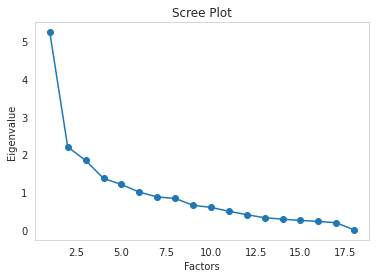

In [ ]:
 # The scree plot method draws a straight line for each factor and its eigenvalues. 
# Number eigenvalues greater than one considered as the number of factors.

# Creating a scree plot using matplotlib
#
plt.scatter(range(1,df_fa.shape[1]+1),ev)
plt.plot(range(1,df_fa.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Checking at the factor loadings
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(df_fa, 6, rotation="varimax")
fa.loadings

# We will note that
# Factor 1 has high factor loadings for : bedrooms, bathrooms, sqlft_living, grade, sgft_above, sqft_living15
# Factor 2 has high factor loadings for : zipcode, long
# Factor 3 has high factor loadings for : sqlft_lot, sqft_lot15
# Factor 4 has high factor loadings for : sqft_basement 
# Factor 5 has high factor loadings for : view, waterfront
# Factor 6 has high factor loadings for : floors,yr_built 

# All factors have at least 1 high factor loadings hence we will use all of them.

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
bedrooms,0.583264,-0.041654,-0.026479,0.185003,-0.056530,-0.045506
bathrooms,0.760523,-0.026155,0.015575,0.162849,0.060190,0.307138
sqft_living,0.957771,-0.006228,0.113605,0.177226,0.121157,0.019643
sqft_lot,0.080799,-0.110104,0.796689,-0.000286,0.032677,-0.006363
floors,0.427029,0.085303,-0.041440,-0.269928,0.008679,0.496202
waterfront,0.036500,0.012162,0.009718,0.001553,0.476097,-0.012561
view,0.172125,0.066808,0.046015,0.116389,0.824449,-0.049843
condition,-0.073833,-0.011802,-0.010422,0.130591,0.016982,-0.379092
grade,0.776264,0.007305,0.058087,-0.009558,0.161138,0.254745
sqft_above,0.913058,-0.087665,0.122835,-0.275168,0.065004,0.155609


In [ ]:
# Step 14: Getting variance of each factors

fa.get_factor_variance()

# Noting total 60% cumulative Variance explained by the 6 factors.

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,4.357242,1.358279,1.480091,1.103390,1.039608,1.446257
Proportion Var,0.242069,0.075460,0.082227,0.061299,0.057756,0.080348
Cumulative Var,0.242069,0.317529,0.399756,0.461056,0.518812,0.599159


From the Factor Analysis, the features can be grouped in 6 broad categories:

* Category 1:bedrooms, bathrooms, sqlft_living, grade, sgft_above, sqft_living15
* Category 2: zipcode, long
* Category 3: sqlft_lot, sqft_lot15
* Category 4: sqft_basement
* Category 5: view, waterfront
* Category 6: floors,yr_built

## 7. Modelling

### Multiple Linear Regression

#### Model

In [ ]:
# Making a copy of data
data = df.copy()

In [ ]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Splitting our dataset
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = data['price']

# Use model_selection.train_test_split from sklearn to split the data into training and testing sets. 
# Set test_size=0.3 and random_state=101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Training/ Fitting  the data set
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
# comparing the test and predicted
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.head(10)

,Actual,Predicted
21193,570000.0,469000.0
12528,209977.0,235000.0
1611,378000.0,280000.0
11455,496700.0,500000.0
18206,1860000.0,1680000.0
19986,1470000.0,635000.0
19716,400000.0,340000.0
7968,432100.0,500000.0
3393,405000.0,416000.0
13962,280000.0,325000.0


In [ ]:
# describe
comparison_frame.describe()

,Actual,Predicted
count,6.483000e+03,6.483000e+03
mean,5.398341e+05,5.169324e+05
std,3.737460e+05,3.313195e+05
min,8.000000e+04,8.100000e+04
25%,3.199950e+05,3.100000e+05
50%,4.500000e+05,4.350000e+05
75%,6.410000e+05,6.000000e+05
max,6.890000e+06,4.000000e+06


In [ ]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mean = data["price"].mean()
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
x = 0.1*mean
print(x)
if rmse >x:
  print("The model is not Fit")
else:
  print("The model is Fit")

Mean Absolute Error: 125716.20770954121
Mean Squared Error: 41029805826.98004
Root Mean Squared Error: 202558.15418535992
54018.778858703205
The model is not Fit


#### Residual Plot

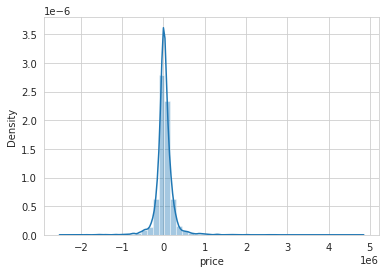

In [ ]:
sb.distplot((y_test-y_pred),bins=50);

#### Cross Validation

In [ ]:
from sklearn.model_selection import LeaveOneOut

# We will use the same 4 independent variables for this
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = data['price']

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
  
  # fit a model accordingly
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 21607 folds
trained 21607 models


202558.15418535986

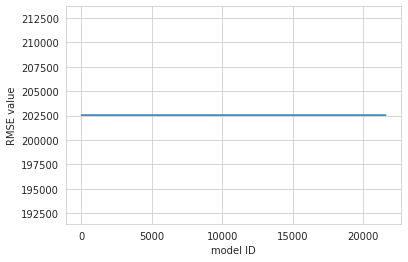

In [ ]:
# Plotting CV
plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

> The RMSE is equal all through

#### Heteroscedasticity



> Bartlett’s test is used to check whether all samples have the same variance. It’s also called Bartlett’s test for homogeneity.We will consider the level of significance of alpha value to be 0.05

In [ ]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 1.5892961761243433e-237
test_statistic = 1083.0577828701412
Critical Value: inf
Variances are equal


### Quantile Regression

In [ ]:
# Creating a linear regression
model = LinearRegression(fit_intercept = True, normalize = False)
model.fit(X, y)

y_pred = model.predict(X)

print
print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred - y) ** 2)))
print('Variance score: {0:.2f}'.format(model.score(X, y)))

# With a low variance score of 0.51, it means that our linear regression 
# did not do a good job. 

Mean squared error: 40452290073.00
Variance score: 0.70


In [ ]:
# We will use the python package statsmodels for Quantile Regression
# Finding the regression coefficients for the conditioned median, 0.5 quantile

mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15', data)
res = mod.fit(q=.5)         
# Then print out the summary of our model

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4736
Model:                       QuantReg   Bandwidth:                   1.949e+04
Method:                 Least Squares   Sparsity:                    2.622e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21607
Time:                        17:27:55   Df Residuals:                    21589
                                        Df Model:                           17
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       145.0037      4.139     35.035      0.000     136.891     153.116
bedrooms      -2.173e+04   1281.175    -16.958      0.000   -2.42e+04   -1.92e+04
bathrooms      2.889e+04   2122.967     13.608      0.000    2.47e+04    3.31e+04
sqft_living     100.6227      2.851  

In [ ]:
# Finding the regression coefficients for the conditioned median, 0.25 quantile

mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15', data)
res = mod.fit(q=.25)         
# Then print out the summary of our model

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4246
Model:                       QuantReg   Bandwidth:                   1.702e+04
Method:                 Least Squares   Sparsity:                    2.929e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21607
Time:                        17:29:32   Df Residuals:                    21589
                                        Df Model:                           17
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -279.0111      4.306    -64.797      0.000    -287.451    -270.571
bedrooms      -1.492e+04   1223.355    -12.195      0.000   -1.73e+04   -1.25e+04
bathrooms      2.899e+04   2057.226     14.093      0.000     2.5e+04     3.3e+04
sqft_living      72.8658      2.799  

In [ ]:
# Finding the regression coefficients for the conditioned median, 0.75 quantile

mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15', data)
res = mod.fit(q=.75)         
# Then print out the summary of our model

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4903
Model:                       QuantReg   Bandwidth:                   1.993e+04
Method:                 Least Squares   Sparsity:                    3.888e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21607
Time:                        17:29:45   Df Residuals:                    21589
                                        Df Model:                           17
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       280.8358      5.388     52.124      0.000     270.275     291.396
bedrooms      -3.376e+04   1805.507    -18.700      0.000   -3.73e+04   -3.02e+04
bathrooms      3.579e+04   2923.937     12.239      0.000    3.01e+04    4.15e+04
sqft_living     156.4272      3.886  

> The linear regression with a Variance score of 0.70 is better compared to the Quantile regressions with Variance score of 0.47 (0.5 quantile), 0.42 (0.25 quantile) and 0.49 (0.75 quantile). Will therefore drop the quantile regression since it's not the best with this dataset

### Ridge Regression

In [ ]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X_train,y_train)
first_model = (mean_squared_error(y_true=y_test,y_pred=regression.predict(X_test)))
print(first_model)

41029805826.98004


In [ ]:
# Determining the value of L2 parameter
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation.

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 

search.fit(X_train,y_train)
search.best_params_
print(search.best_params_)
abs(search.best_score_)


# The best_params_ tells us what to set alpha too which in this case is 0.001. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 40607326785.8788 is better than what the baseline model was (41029805826.98004) 

{'alpha': 0.001}


40607326785.8788

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y_test,y_pred=ridge.predict(X_test)))
print(second_model)

41030401703.620155


In [ ]:
# The 40458732875.92281 is lower than the 40940545272.74455. This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,data.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 81227.35096540964,
 'bedrooms': 30099.44713994587,
 'condition': 114115.26415799216,
 'floors': 52471.59187161193,
 'grade': 74203.88110438285,
 'lat': -30966.037337103757,
 'long': 15749.59310041911,
 'price': -35710.838673726525,
 'sqft_above': 29416.584322985353,
 'sqft_basement': -77208.62020694732,
 'sqft_living': 7350.381320211467,
 'sqft_living15': -11892.154624702354,
 'sqft_lot': 5312.778775483686,
 'view': 16586.248013760858,
 'waterfront': 37270.98281810334,
 'yr_built': 9362.640104969114,
 'yr_renovated': -33147.103617498185,
 'zipcode': 82744.44223513815}

In [ ]:
# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mean = data["price"].mean()
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
x = 0.1*mean
print(x)
if rmse >x:
  print("The model is not Fit")
else:
  print("The model is Fit")

Mean Absolute Error: 125716.20677526237
Mean Squared Error: 41029805484.33224
Root Mean Squared Error: 202558.15333955886
54018.778858703205
The model is not Fit


### Lasso Regression

In [ ]:
# Fitting Lasso Regression
# The hyperparameter, α, lets us control how much we penalize the coefficients, 
# with higher values of α creating simpler modelers. The ideal value of α
# should be tuned like any other hyperparameter. In scikit-learn, α
# is set using the alpha parameter.
# 

# Creating lasso regression with alpha value
regr = Lasso(alpha=0.01)

# Fitting the linear regression
model = regr.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
# comparing the test and predicted
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.head(10)

,Actual,Predicted
21193,570000.0,5.097653e+05
12528,209977.0,2.580926e+05
1611,378000.0,2.182309e+05
11455,496700.0,5.026478e+05
18206,1860000.0,1.403995e+06
19986,1470000.0,7.418727e+05
19716,400000.0,4.941714e+05
7968,432100.0,5.744444e+05
3393,405000.0,4.891215e+05
13962,280000.0,2.938250e+05


In [ ]:
# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mean = data["price"].mean()
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
x = 0.1*mean
print(x)
if rmse >x:
  print("The model is not Fit")
else:
  print("The model is Fit")

Mean Absolute Error: 125716.20677526237
Mean Squared Error: 41029805484.33224
Root Mean Squared Error: 202558.15333955886
54018.778858703205
The model is not Fit


### Elastic Net Regression

In [ ]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X_train,y_train)
first_model=(mean_squared_error(y_true=y_test,y_pred=regression.predict(X_test)))
print(first_model) 

# This mean standard error score of 1.05 is our benchmark for determining 
# if the elastic net model will be better or worst. 

41029805826.98004


In [ ]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X_train,y_train)
search.best_params_
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


40637650725.8795

In [ ]:
# The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 40637650725.8795. This is below our baseline model of MSE 41029805826.98004  for the baseline model. 
# Which means that elastic net is doing better than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train,y_train)
second_model=(mean_squared_error(y_true=y_train,y_pred=elastic.predict(X_train)))
print(second_model)

40298816658.08166


In [ ]:
# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mean = data["price"].mean()
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
x = 0.1*mean
print(x)
if rmse >x:
  print("The model is not Fit")
else:
  print("The model is Fit")

Mean Absolute Error: 125716.20677526237
Mean Squared Error: 41029805484.33224
Root Mean Squared Error: 202558.15333955886
54018.778858703205
The model is not Fit


## 8. Implementing the Solution

1. Linear Regression
* Mean Absolute Error: 125716.20770954121
* Mean Squared Error: 41029805826.98004
* Root Mean Squared Error: 202558.15418535992

2. Ridge Regression
* Mean Absolute Error: 125716.20677526237
* Mean Squared Error: 41029805484.33224
* Root Mean Squared Error: 202558.15333955886

2. Lasso Regression
* Mean Absolute Error: 125716.20677526237
* Mean Squared Error: 41029805484.33224
* Root Mean Squared Error: 202558.15333955886

3. Elastic Net Regression
* Mean Absolute Error: 125716.20677526237
* Mean Squared Error: 41029805484.33224
* Root Mean Squared Error: 202558.15333955886

> From the above ratios, Ridge, Lasso and Elastic Net has the same RMSE which is lower than RMSE of the Linear regression. This shows that either of the three is best suited to be used to predict the Property prices.

## 9. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






## 10. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> Yes.

### b). Do we need other data to answer our question?

> No

### c). Did we have the right question?

> Yes